In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as mt
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

In [2]:
#!pip install autoviml

In [3]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.684. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [4]:
!pip install -q -U git+https://github.com/mljar/mljar-supervised.git@master

In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/PHD-Practice/mith_train_initial_dataset.csv')
df_train_copy = df_train.copy()
df_train.shape

(16810, 19)

In [6]:
df_train.head(10)

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,PropertyEvaluationvalue,year_evaluation
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,540000,2014
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,750000,2014
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,470000,2014
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,570000,2014
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,640000,2015
5,PR11106,1,NY,BATHGATE,3825 3RD AVENUE,10457,2912,26,14 RENTALS - 4-10 UNIT,4,1,5,2000,5940,2007,2,S4,1350000,2015
6,PR11107,1,NY,BATHGATE,476 EAST 186 STREET,10458,3039,159,02 TWO FAMILY DWELLINGS,2,0,2,2033,2400,1993,1,B1,400000,2014
7,PR11108,1,NY,BATHGATE,559 CLAREMONT PARKWAY,10457,2929,128,02 TWO FAMILY DWELLINGS,2,0,2,2361,2394,1991,1,B1,514216,2015
8,PR11109,1,NY,BATHGATE,3864 3RD AVENUE,10457,2929,119,02 TWO FAMILY DWELLINGS,2,0,2,2432,2394,1991,1,B1,679000,2014
9,PR11110,1,NY,BATHGATE,1941 WASHINGTON AVENUE,10457,3034,137,02 TWO FAMILY DWELLINGS,2,0,2,2663,3204,1991,1,B1,520000,2014


In [7]:

df_test = pd.read_csv('/content/drive/MyDrive/PHD-Practice/mith_test_initial_dataset.csv')
df_test_copy = df_test.copy()
df_test.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,year_evaluation
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,2013
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,2014
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,2015
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,2015
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,2014


In [8]:
sub=pd.read_csv('/content/drive/MyDrive/PHD-Practice/mith_test_initial_dataset.csv')
for i in sub.columns:
    if i != 'PropertyID':
        del sub[i]
sub['PropertyEvaluationvalue'] = -1
del sub['PropertyEvaluationvalue']

In [9]:
df_test['PropertyEvaluationvalue'] = 0
#append test to train for feature creation
full=df_train.append(df_test)
#full=full.reset_index()
#full=full.drop('PropertyId',axis=1)
print(full.shape)

(19746, 19)


In [10]:
full=full.set_index('PropertyID')

In [11]:
full['ageofproperty'] = full['year_evaluation'] - full['YearOfConstruction']
full=full.drop(columns=['year_evaluation','YearOfConstruction','State','Address','Block','Lot','Surroundings'])

In [12]:
brand_dictionary = ['A', 'B', 'C', 'D', 'R', 'S', 'H', 'K', 'L', 'O', 'E', 'F','G','T','U','V','I','J','M','N','P','Q','W','Y','Z']
def match_dictionary(string, dictionary):
    for brand in dictionary:
        if(re.search(brand, string, re.IGNORECASE)):
            return brand
    return "Other"

In [13]:
full['bldg_class'] = full['BldgClass_AtEvaluationTime'].apply(lambda x: match_dictionary(x, brand_dictionary))
full=full.drop(columns=['BldgClass_AtEvaluationTime','BldgClassCategory'])

In [14]:
full['Borough'] = full['Borough'].astype(str)
full['TaxClass_AtEvaluationTime'] = full['TaxClass_AtEvaluationTime'].astype(str)

In [15]:
zipprice=full.groupby('ZipCode')['PropertyEvaluationvalue'].mean()
# target encoding using zipcode column
full['ZipCode'] = full['ZipCode'].map(zipprice)

In [16]:
train = full[full['PropertyEvaluationvalue']!=0]
test = full[full['PropertyEvaluationvalue']==0]

In [17]:
train['PropertyEvaluationvalue'] = np.log(train['PropertyEvaluationvalue'])

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (16810, 11)
    Training Set Memory Usage = 1.54 MB
Test Set Shape = (2936, 11)
    Test Set Memory Usage = 0.27 MB
Single_Label Target: ['PropertyEvaluationvalue']
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 16810 rows, 10 cols
Data Set columns info:
* Borough: 0 nulls, 5 unique vals, most common: {'5': 6362, '3': 4879}
* ZipCode: 0 nulls, 174 unique vals, most common: {454662.91464435146: 1002, 455035.19337979093: 965}
* NoOfResidentialUnits: 0 nulls, 70 unique vals, most common: {1: 9850, 2: 4705}
* NoOfCommercialUnits: 0 nulls, 18 unique vals, most common: {0: 15790, 1: 647}
* TotalNoOfUnits: 0 nulls, 75 unique vals, most common: {1: 10283, 2: 4909}
* LandAreaInSqFt

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.023366
0:	learn: 0.6423380	test: 0.6640853	best: 0.6640853 (0)	total: 150ms	remaining: 17m 26s


500:	learn: 0.4334932	test: 0.4674170	best: 0.4674170 (500)	total: 14.9s	remaining: 3m 13s
1000:	learn: 0.4125240	test: 0.4598011	best: 0.4597918 (999)	total: 29.5s	remaining: 2m 56s
1500:	learn: 0.3978755	test: 0.4557167	best: 0.4557167 (1500)	total: 43.2s	remaining: 2m 38s
2000:	learn: 0.3871466	test: 0.4533067	best: 0.4533017 (1997)	total: 55.9s	remaining: 2m 19s
2500:	learn: 0.3785191	test: 0.4518168	best: 0.4518168 (2500)	total: 1m 3s	remaining: 1m 53s
3000:	learn: 0.3708532	test: 0.4505339	best: 0.4505050 (2995)	total: 1m 8s	remaining: 1m 31s
3500:	learn: 0.3640704	test: 0.4492084	best: 0.4491775 (3485)	total: 1m 14s	remaining: 1m 13s
4000:	learn: 0.3582959	test: 0.4484861	best: 0.4484269 (3938)	total: 1m 19s	remaining: 59.6s
4500:	learn: 0.3528633	test: 0.4478917	best: 0.4478866 (4496)	total: 1m 25s	remaining: 47.3s
5000:	learn: 0.3477356	test: 0.4475169	best: 0.4475169 (5000)	total: 1m 31s	remaining: 36.4s
5500:	learn: 0.3427738	test: 0.4472912	best: 0.4472773 (5142)	total: 1m 

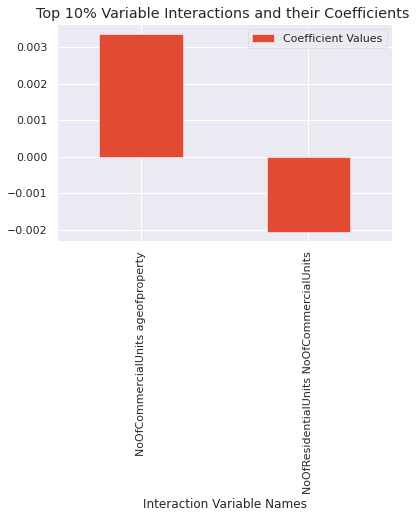

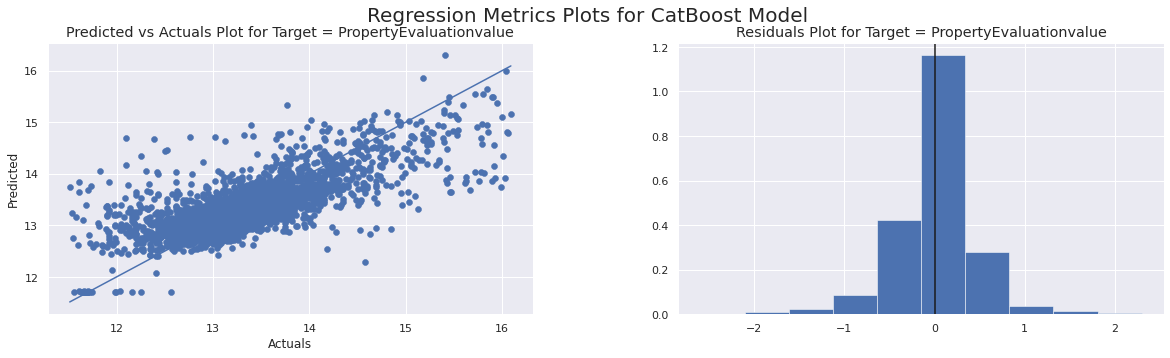

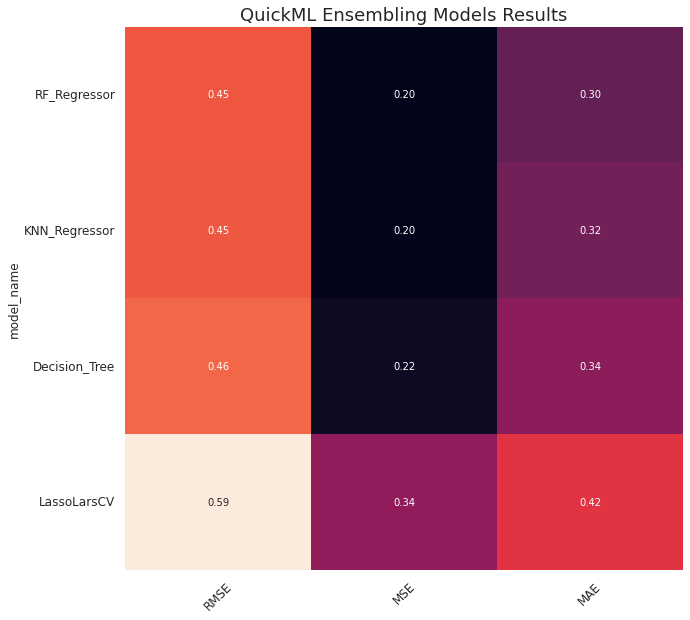

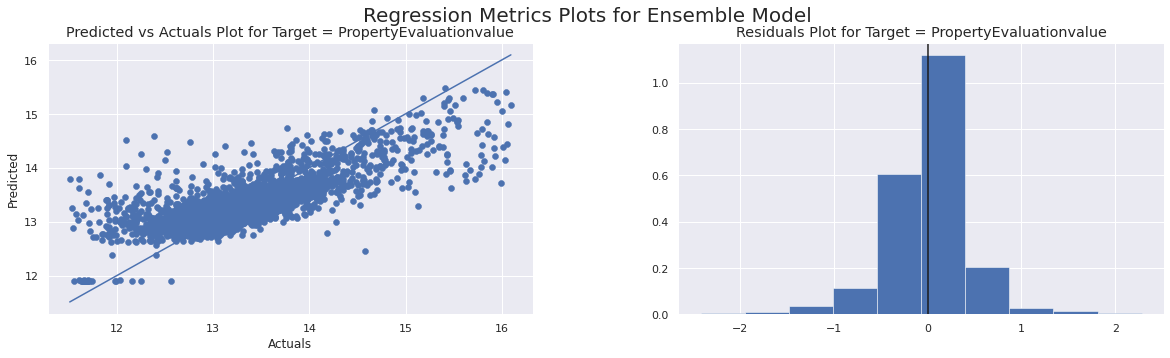

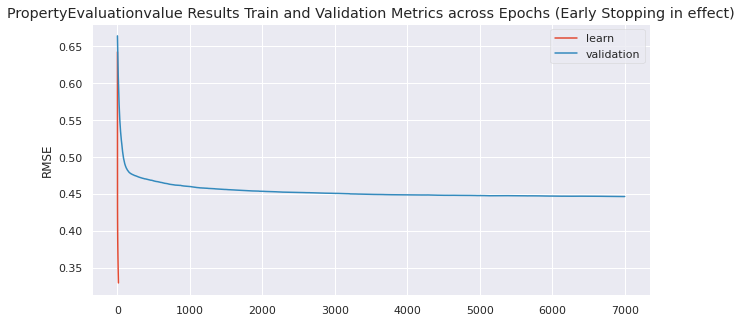

    Time taken for this Target (in seconds) = 145
    Binning_Flag set to False or there are no float vars in data set to be binned
Adding one feature named PropertyEvaluationvalue_KMeans_Clusters using KMeans_Featurizer...
    Used KMeans to naturally cluster Train predictor variables into 4 clusters
    Setting best params for CatBoost model from Initial State since you cannot change params to a fitted Catboost model 
    Number of Categorical and Integer variables used in CatBoost training = 10
No MinMax scaling performed since scaling flag is set to false
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
0:	learn: 0.6462037	total: 14.6ms	remaining: 1m 41s
500:	learn: 0.4361984	total: 5.27s	remaining: 1m 8s
1000:	learn: 0.4174517	total: 10.6s	remaining: 1m 3s
1500:	learn: 0.4055139	total: 16s	remaining: 58.5s
2000:	learn: 0.3951355	total: 21.8s	remaining: 54s
2500:	learn: 0.3864874	total: 27.7s	remaining: 49.6s
3000:	learn: 0.3798178	total: 33.

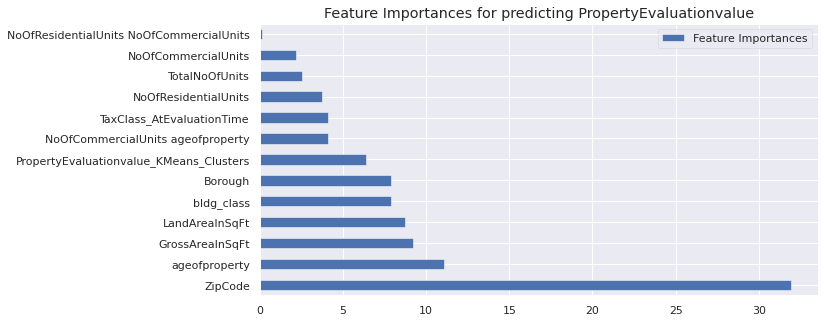

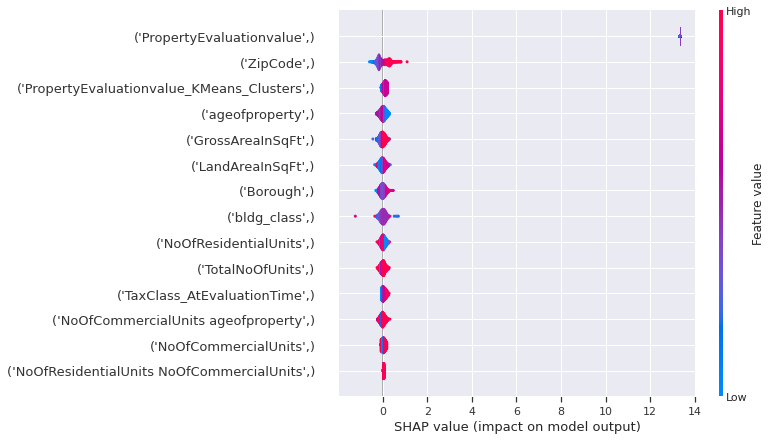

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 254
Writing Output files to disk...
    Saving predictions to ./PropertyEvaluationvalue/PropertyEvaluationvalue_Regression_test_modified.csv
    Saving predictions to ./PropertyEvaluationvalue/PropertyEvaluationvalue_Regression_submission.csv
    Saving predictions to ./PropertyEvaluationvalue/PropertyEvaluationvalue_Regression_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 4.2 for the Entire Process


In [18]:
target  = 'PropertyEvaluationvalue'
model, features, trainm, testm = Auto_ViML(
    train,
    target,
    test,
    sub,
    hyper_param="RS",
    feature_reduction=False,
    scoring_parameter= "neg_mean_absolute_percentage_error",#
    KMeans_Featurizer=True,#False,
    Boosting_Flag= 'catboost',#True,#
    Binning_Flag=False,
    Add_Poly=1,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=2,
)

In [19]:
sub['PropertyEvaluationvalue'] = np.expm1(sub['PropertyEvaluationvalue'])

In [20]:
sub.head()

,PropertyID,PropertyEvaluationvalue
0,PR51101,"531,534.46"
1,PR51102,"521,849.87"
2,PR51103,"792,633.83"
3,PR51104,"1,616,394.39"
4,PR51105,"567,695.60"


In [21]:
from supervised.automl import AutoML # mljar-supervised

In [22]:
col = list(trainm.columns)
col.remove('PropertyEvaluationvalue')

In [23]:
x_cols = col
y_col = 'PropertyEvaluationvalue'

In [24]:
#automlbase = AutoML(mode="Explain",eval_metric="mape",results_path="/content/drive/MyDrive/Agri/MLJAR_Explain",explain_level=2)
#automlbase.fit(trainm[x_cols], trainm[y_col])

In [25]:
automl = AutoML(
    mode="Compete", 
    eval_metric="mape",
    total_time_limit=150000,results_path="/content/drive/MyDrive/Agri/AutoML_Final_Compete_Time150000",
    features_selection=False # switch off feature selection
)
automl.fit(trainm[x_cols], trainm[y_col])

Linear algorithm was disabled.
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.


In [26]:
preds = automl.predict(testm[x_cols])

In [27]:
sub['PropertyEvaluationvalue'] = np.expm1(preds)

In [28]:
sub

,PropertyID,PropertyEvaluationvalue
0,PR51101,"578,261.10"
1,PR51102,"531,919.25"
2,PR51103,"1,149,034.73"
3,PR51104,"938,930.85"
4,PR51105,"685,581.01"
...,...,...
2931,PR54032,"889,845.82"
2932,PR54033,"3,963,070.98"
2933,PR54034,"3,793,420.57"
2934,PR54035,"3,249,901.65"


In [29]:
sub.to_csv('/content/drive/MyDrive/Agri/final_sub.csv', index=False)

In [30]:
sub.describe()

,PropertyEvaluationvalue
count,"2,936.00"
mean,"756,427.58"
std,"658,661.21"
min,"117,582.19"
25%,"465,189.84"
50%,"574,716.55"
75%,"793,072.74"
max,"6,959,220.77"


In [33]:
automl2 = AutoML(
    mode="Perform", 
    eval_metric="mape",results_path="/content/drive/MyDrive/Agri/New/Automl_Perform"
    total_time_limit=150000,,
    features_selection=False # switch off feature selection
)
automl.fit(trainm[x_cols], trainm[y_col])

This model has already been fitted. You can use predict methods or select a new 'results_path' for a new a 'fit()'.


In [35]:
automl2 = AutoML(mode="Perform",eval_metric="mape",results_path="/content/drive/MyDrive/Agri/Automl_Perform")
automl2.fit(trainm[x_cols], trainm[y_col])

Linear algorithm was disabled.
AutoML directory: /content/drive/MyDrive/Agri/Automl_Perform
The task is regression with evaluation metric mape
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM mape 0.019357 trained in 75.18 seconds (1-sample predict time 0.0627 seconds)
2_Default_Xgboost mape 0.027285 trained in 21.48 seconds (1-sample predict time 0.1152 seconds)
3_Default_CatBoost mape 0.019437 trained in 25.62 seconds (1-sample predict time 0.0711 seconds)
4_Default_NeuralNetwork mape 0.022609 trained in 21.02 seconds (1-sample predict time 0.1156 seconds)
5_Default_RandomF

AutoML(eval_metric='mape', mode='Perform',
       results_path='/content/drive/MyDrive/Agri/Automl_Perform')